In [528]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import accuracy_score

In [529]:
df = pd.read_csv('energy_production (2).csv',sep=";")

In [530]:
df

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [531]:
df

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


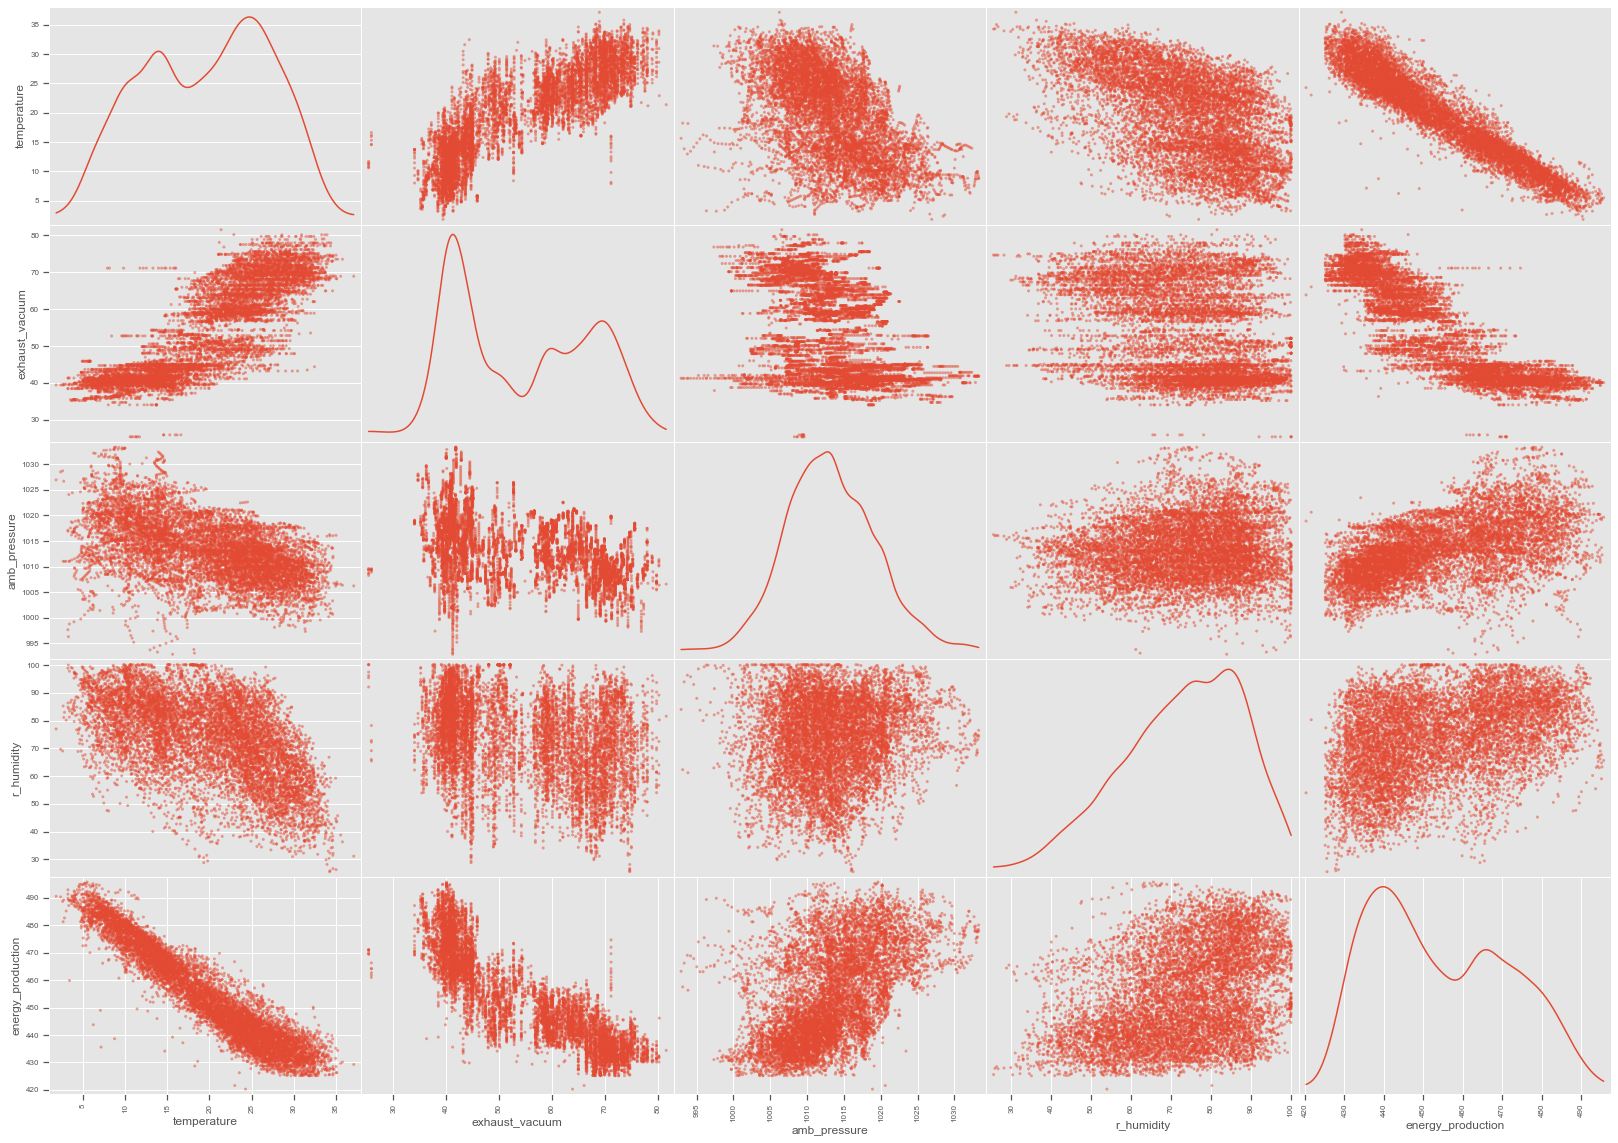

In [533]:
scatter_matrix(df, figsize=(28, 20),diagonal="kde");


In [534]:
df.rename(columns={"temperature":"AT" , "exhaust_vacuum":"V" , "amb_pressure":"AP" , "r_humidity":"RH" , "energy_production": "PE"}, inplace=True)

In [535]:
df

AT      V       AP     RH      PE
0      9.59  38.56  1017.01  60.10  481.30
1     12.04  42.34  1019.72  94.67  465.36
2     13.87  45.08  1024.42  81.69  465.48
3     13.72  54.30  1017.89  79.08  467.05
4     15.14  49.64  1023.78  75.00  463.58
...     ...    ...      ...    ...     ...
9563  17.10  49.69  1005.53  81.82  457.32
9564  24.73  65.34  1015.42  52.80  446.92
9565  30.44  56.24  1005.19  56.24  429.34
9566  23.00  66.05  1020.61  80.29  421.57
9567  17.75  49.25  1020.86  63.67  454.41

[9568 rows x 5 columns]

In [536]:
lm = smf.ols(formula="PE ~ AT + V + AP + RH", data=df).fit()
lm.params

Intercept    454.609274
AT            -1.977513
V             -0.233916
AP             0.062083
RH            -0.158054
dtype: float64

In [537]:
#The above values tell us that we can use the following formula to predict the output power using AT, V, AP, and RH:

#PE = 454.609274 - 1.977513 * AT - 0.233916 * V + 0.062083 * AP - 0.158054 * RH
#To test if the model is able to predict the output, we will use the first entry of the data set

In [538]:
lm.predict(pd.DataFrame({"AT": [9.48], "V": [44.71], "AP": [1019.12], "RH": [66.43]}))

0    478.174482
dtype: float64

In [539]:
#PE=451.067793−1.974731AT−0.234992V+0.065540AP−0.157598RH

Text(0.5, 1.0, 'Residual Plot of AT')

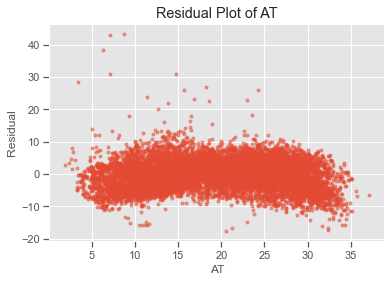

In [540]:
residuals = lm.predict(df) - df.PE
plt.plot(df.AT, residuals, ".", alpha=0.5)
plt.xlabel("AT")
plt.ylabel("Residual");
plt.title("Residual Plot of AT")


Text(0.5, 1.0, 'Residual Plot of V')

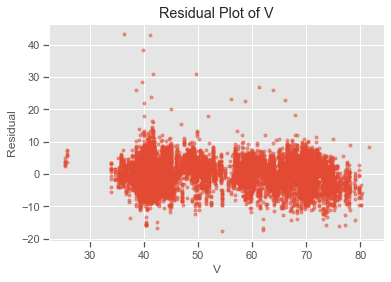

In [541]:
plt.plot(df.V, residuals, ".", alpha=0.5)
plt.xlabel("V")
plt.ylabel("Residual");
plt.title("Residual Plot of V")

Text(0.5, 1.0, 'Residual Plot of AP')

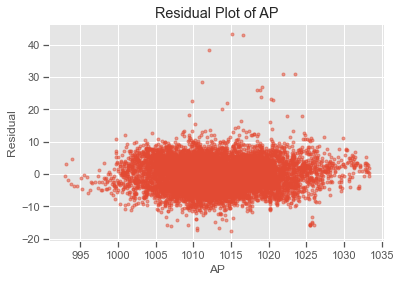

In [542]:
plt.plot(df.AP, residuals, ".", alpha=0.5)
plt.xlabel("AP")
plt.ylabel("Residual");
plt.title("Residual Plot of AP")

Text(0.5, 1.0, 'Residual Plot of RH')

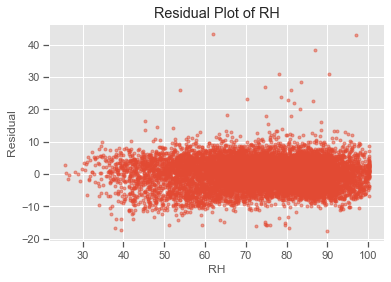

In [543]:
plt.plot(df.RH, residuals, ".", alpha=0.5)
plt.xlabel("RH")
plt.ylabel("Residual");
plt.title("Residual Plot of RH")

In [544]:
df_1 = df['AT']
df_2 = df[['AT', 'V']]
df_3 = df[['AT', 'V', 'AP']]
df_4 = df[['AT', 'V', 'AP', 'RH']]

In [545]:
y = df['PE']

In [546]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)


In [547]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = regressor.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.316818730592487
r_squared:  0.9034130676009542
mae:  4.225913433033885


In [548]:
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)



In [549]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.82494965305251
r_squared:  0.9204573167404508
mae:  3.851239068584341


In [550]:
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)


In [554]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.756304649118821
r_squared:  0.9227045386826225
mae:  3.8025186809494405


In [555]:
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [556]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.406298074515566
r_squared:  0.9336619944003095
mae:  3.5499908529259034


In [557]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [558]:
df.shape

(9568, 5)

<AxesSubplot:>

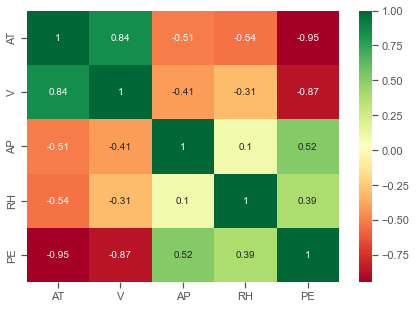

In [559]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True,cmap="RdYlGn")

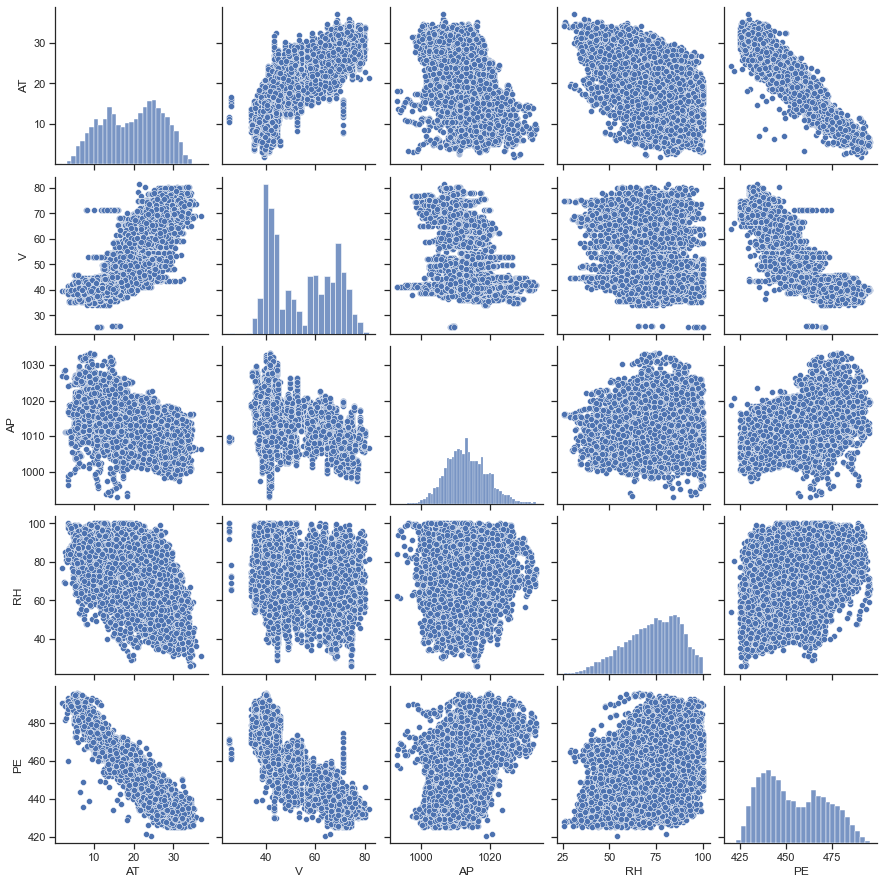

In [560]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind = 'hist',palette='BuGn')

In [561]:
df_1 = df['AT']

In [562]:
df_2 = df[['AT', 'V']]

In [563]:
df_3 = df[['AT', 'V', 'RH']]

In [564]:
df_4 = df[['AT', 'V', 'AP', 'RH']]

In [565]:
y = df['PE']

In [566]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

In [567]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [568]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

In [569]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [570]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [571]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [572]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [573]:
y_pred = regressor.predict(Xtest)

In [574]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [575]:
y_pred = dt_regressor.predict(Xtest)

In [576]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(Xtrain, ytrain)

RandomForestRegressor()

In [577]:
y_pred = rf_regressor.predict(Xtest)

In [578]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
rmse

3.154786741599791

In [579]:
from sklearn.metrics import r2_score
r_squared = r2_score(ytest, y_pred)
r_squared

0.9659940682205898

In [580]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_pred)
mae

2.3055335423197443

In [581]:
gradient_boosted = GradientBoostingRegressor()


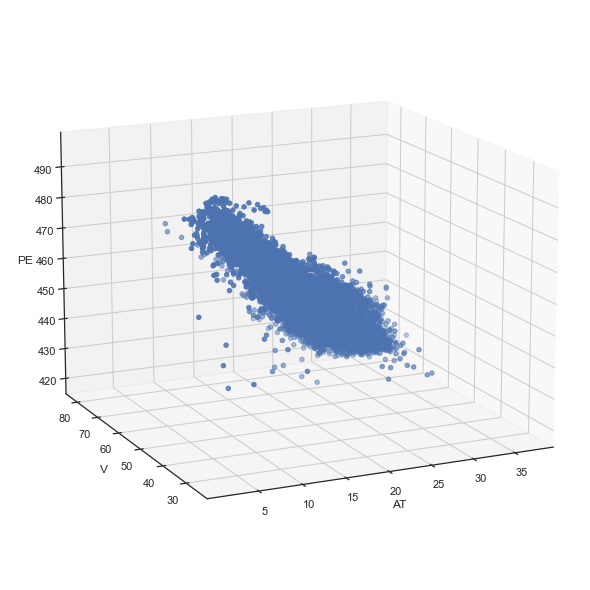

In [582]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(df["AT"], df["V"], df["PE"])
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("PE")
ax.set_facecolor("white")

''

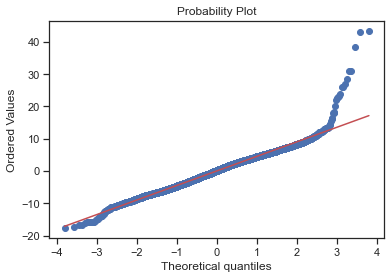

In [583]:
scipy.stats.probplot(residuals, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111));""

In [584]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:50:23   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

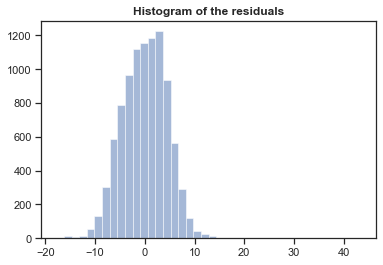

In [585]:
plt.hist(residuals, bins=40, alpha=0.5)
plt.title("Histogram of the residuals", weight="bold");

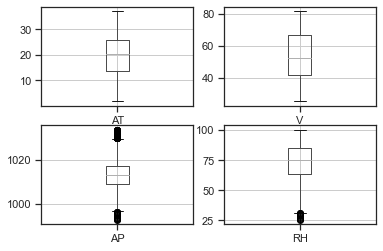

In [586]:
fig, axes = plt.subplots(2,2)
for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]
             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9563  0.015421  0.044810  0.906771  0.073784  0.412404
9564  0.022222  0.058713  0.912432  0.047445  0.401592
9565  0.027765  0.051297  0.916848  0.051297  0.391607
9566  0.020732  0.059538  0.919990  0.072374  0.380008
9567  0.015842  0.043955  0.911105  0.056

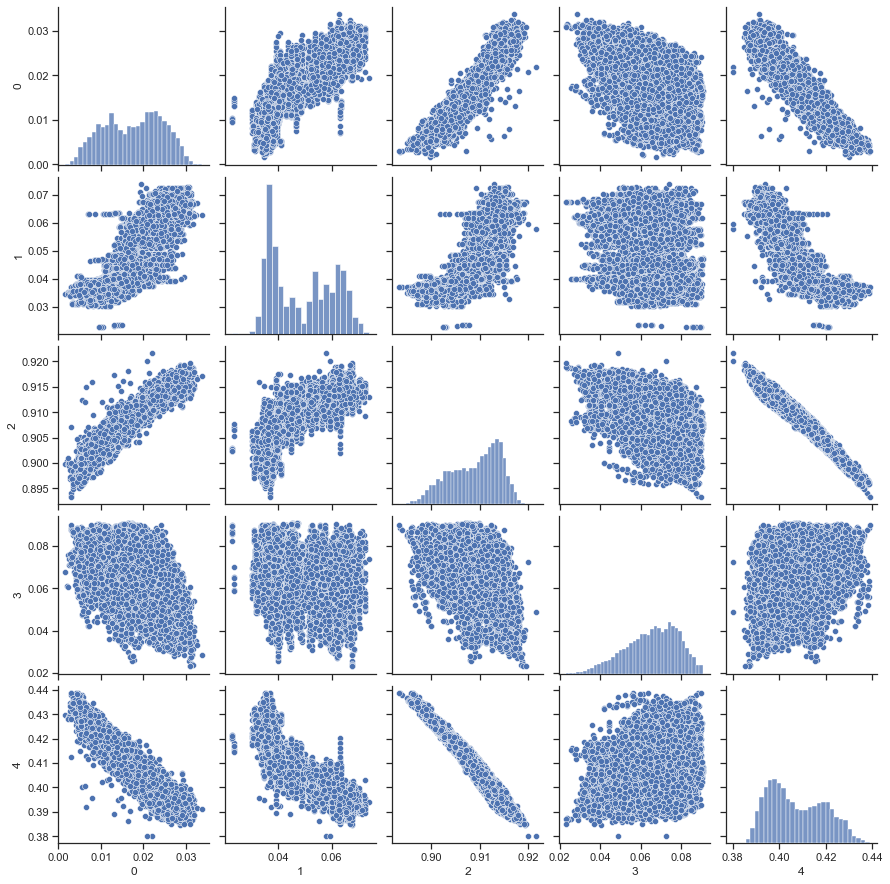

In [587]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import seaborn as sns
df_nor=preprocessing.normalize(df)
print(df_nor)
df_nor=pd.DataFrame(df_nor)
print(df_nor)
sns.pairplot(df_nor)
df_nor.corr()
df_nor.columns = df.columns
df_nor.head()
x=df_nor.iloc[:,0:4]
y=df_nor.iloc[:,4]

In [588]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [589]:
#fitting linear model:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
pred=lm.predict(X_train)
print(pred)
print(model.coef_)
print(model.intercept_)

[0.42011262 0.40199238 0.39414814 ... 0.43051527 0.4226824  0.40985496]
[-0.06120236 -0.14254473 -2.13928203 -0.14812836]
2.370037230353746


In [590]:
#checking accuracy:
from sklearn.metrics import r2_score
print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))

0.9990239894915233
0.9988922860134516


Text(0.5, 1.0, 'Observed vs. Predicted Values')

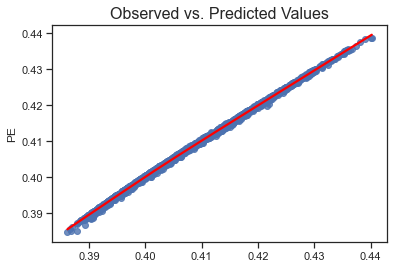

In [591]:
sns.regplot(x=predd, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)

In [592]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

array([[<AxesSubplot:xlabel='AT', ylabel='AT'>,
        <AxesSubplot:xlabel='V', ylabel='AT'>,
        <AxesSubplot:xlabel='AP', ylabel='AT'>,
        <AxesSubplot:xlabel='RH', ylabel='AT'>,
        <AxesSubplot:xlabel='PE', ylabel='AT'>],
       [<AxesSubplot:xlabel='AT', ylabel='V'>,
        <AxesSubplot:xlabel='V', ylabel='V'>,
        <AxesSubplot:xlabel='AP', ylabel='V'>,
        <AxesSubplot:xlabel='RH', ylabel='V'>,
        <AxesSubplot:xlabel='PE', ylabel='V'>],
       [<AxesSubplot:xlabel='AT', ylabel='AP'>,
        <AxesSubplot:xlabel='V', ylabel='AP'>,
        <AxesSubplot:xlabel='AP', ylabel='AP'>,
        <AxesSubplot:xlabel='RH', ylabel='AP'>,
        <AxesSubplot:xlabel='PE', ylabel='AP'>],
       [<AxesSubplot:xlabel='AT', ylabel='RH'>,
        <AxesSubplot:xlabel='V', ylabel='RH'>,
        <AxesSubplot:xlabel='AP', ylabel='RH'>,
        <AxesSubplot:xlabel='RH', ylabel='RH'>,
        <AxesSubplot:xlabel='PE', ylabel='RH'>],
       [<AxesSubplot:xlabel='AT', ylabel='PE'

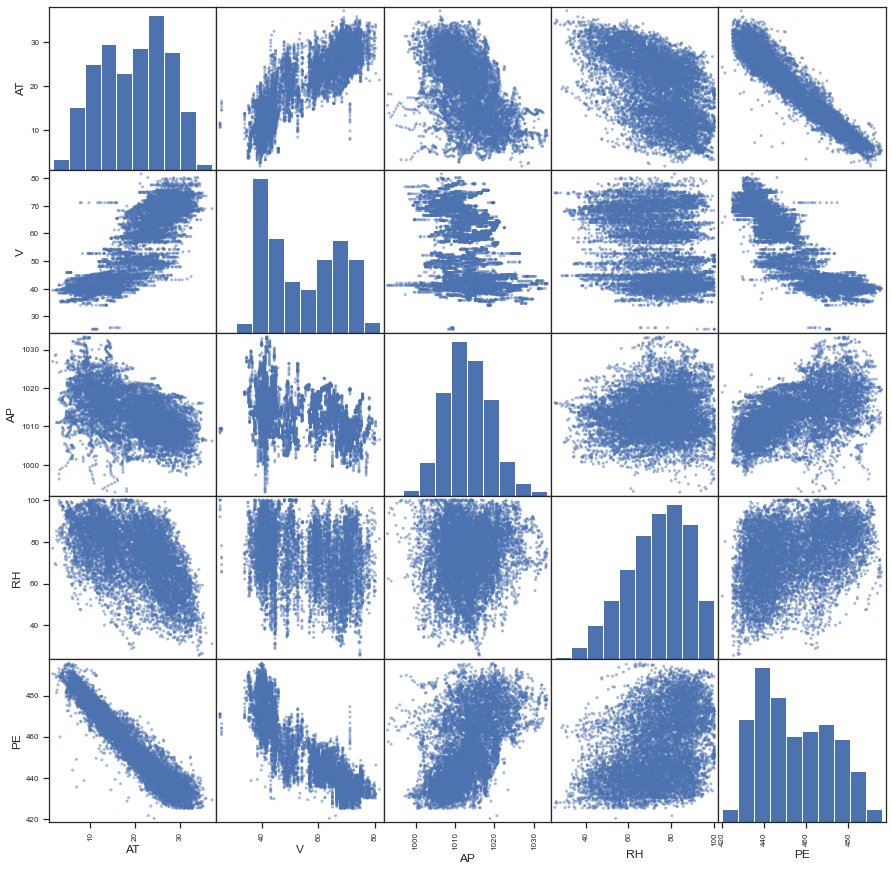

In [593]:
scatter_matrix(df,figsize=(15,15))                          
 

In [594]:
df_1 = df['AT']
df_2 = df[['AT','V']]
df_3 = df[['AT','V','RH']]
df_4 = df[['AT','V','AP','RH']]
y = df['PE']

In [595]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

In [596]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [597]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [598]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

In [599]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

In [600]:
df[df.duplicated()].shape

(41, 5)

In [601]:
df[df.duplicated()]

AT      V       AP     RH      PE
2066  10.72  41.17  1019.68  60.71  479.21
2780  28.41  75.60  1018.48  56.07  440.28
3333  24.79  75.60  1017.07  68.23  440.05
3467   7.64  41.17  1020.01  75.14  488.53
3550  25.42  75.60  1017.39  77.63  438.24
3747  11.61  41.17  1019.57  58.82  476.81
4292  12.27  41.17  1019.41  58.10  475.13
4528  24.63  59.57  1010.45  85.36  440.67
5065   8.57  41.17  1020.18  72.47  484.20
5564  11.82  41.17  1019.50  55.74  475.61
5812  25.21  75.60  1017.19  69.84  445.84
5975   7.87  41.17  1020.33  77.77  486.20
5983   6.86  41.17  1020.12  79.14  490.23
6413  28.84  75.60  1018.41  53.96  442.69
6861  11.23  41.17  1019.36  56.85  475.85
6948  25.56  75.60  1017.37  69.31  442.20
7065   9.83  41.17  1019.34  72.29  478.21
7124  26.12  75.60  1017.41  72.31  439.68
7231  29.23  75.60  1017.72  52.26  438.92
7274  12.19  41.17  1019.43  65.47  475.64
7453  26.45  75.60  1017.42  74.50  436.89
7675   6.06  41.17  1019.67  84.70  489.62
7732  29.51  75.60  1017.92  50.61  431.18
7779  12.11  41.17  1019.46  62.59  475.53
7821  28.37  75.60  1017.48  55.19  439.25
7839   8.44  41.17  1019.90  70.72  486.15
7843  29.05  75.60  1017.63  51.16  439.14
7907   8.07  41.17  1019.40  86.43  484.54
7948  26.85  75.60  1017.43  74.55  433.48
8212  27.54  75.60  1018.26  57.89  440.87
8290   7.24  41.17  1020.35  80.56  486.76
8542  25.79  75.60  1017.46  75.63  434.65
8777  25.53  59.57  1010.65  82.04  445.59
8879   9.54  41.17  1019.79  65.61  481.18
9028   6.40  41.17  1019.54  85.37  488.82
9154  29.45  75.60  1018.12  50.68  437.31
9163   6.03  41.17  1019.81  84.20  488.57
9272  12.00  41.17  1019.48  58.71  474.40
9482  12.27  41.17  1019.39  52.18  473.84
9521  27.64  75.60  1017.35  54.78  441.04
9537  25.91  75.60  1018.23  62.65  443.20

In [602]:
data_cleaned = df.drop_duplicates()

In [603]:
data_cleaned

AT      V       AP     RH      PE
0      9.59  38.56  1017.01  60.10  481.30
1     12.04  42.34  1019.72  94.67  465.36
2     13.87  45.08  1024.42  81.69  465.48
3     13.72  54.30  1017.89  79.08  467.05
4     15.14  49.64  1023.78  75.00  463.58
...     ...    ...      ...    ...     ...
9563  17.10  49.69  1005.53  81.82  457.32
9564  24.73  65.34  1015.42  52.80  446.92
9565  30.44  56.24  1005.19  56.24  429.34
9566  23.00  66.05  1020.61  80.29  421.57
9567  17.75  49.25  1020.86  63.67  454.41

[9527 rows x 5 columns]

In [604]:
data_cleaned2 = data_cleaned[data_cleaned['AP'] < 1030]
data_cleaned2 = data_cleaned[data_cleaned['AP'] > 995]
data_cleaned2 = data_cleaned[data_cleaned['RH'] > 30]

In [605]:
data_cleaned2

AT      V       AP     RH      PE
0      9.59  38.56  1017.01  60.10  481.30
1     12.04  42.34  1019.72  94.67  465.36
2     13.87  45.08  1024.42  81.69  465.48
3     13.72  54.30  1017.89  79.08  467.05
4     15.14  49.64  1023.78  75.00  463.58
...     ...    ...      ...    ...     ...
9563  17.10  49.69  1005.53  81.82  457.32
9564  24.73  65.34  1015.42  52.80  446.92
9565  30.44  56.24  1005.19  56.24  429.34
9566  23.00  66.05  1020.61  80.29  421.57
9567  17.75  49.25  1020.86  63.67  454.41

[9519 rows x 5 columns]

In [606]:
data_cleaned2.describe()

AT            V           AP           RH           PE
count  9519.000000  9519.000000  9519.000000  9519.000000  9519.000000
mean     19.649001    54.283302  1013.235893    73.373401   454.350525
std       7.438398    12.681512     5.942108    14.553212    17.032315
min       1.810000    25.360000   992.890000    30.340000   420.260000
25%      13.520000    41.740000  1009.075000    63.395000   439.770000
50%      20.340000    52.080000  1012.920000    75.010000   451.590000
75%      25.710000    66.510000  1017.200000    84.860000   468.370000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [607]:
data_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9519 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9519 non-null   float64
 1   V       9519 non-null   float64
 2   AP      9519 non-null   float64
 3   RH      9519 non-null   float64
 4   PE      9519 non-null   float64
dtypes: float64(5)
memory usage: 446.2 KB


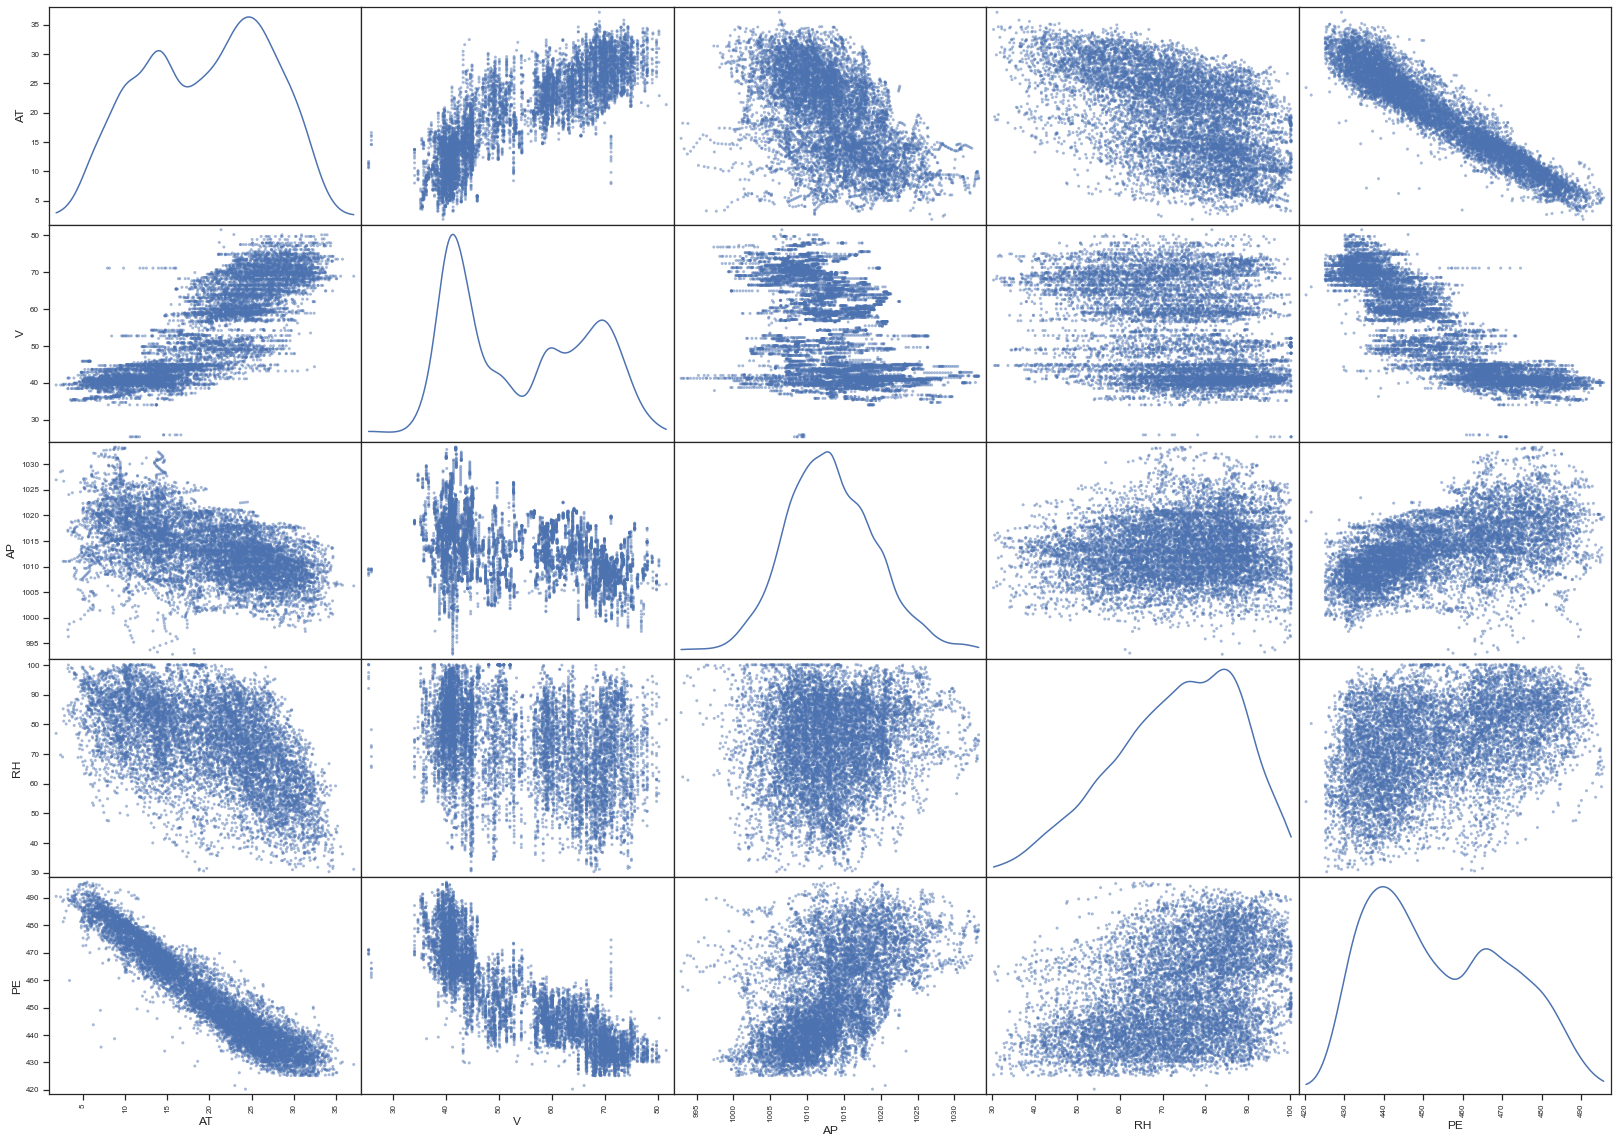

In [608]:
scatter_matrix(data_cleaned2, figsize=(28, 20),diagonal="kde");

In [609]:
lm = smf.ols(formula="PE ~ AT + V + AP + RH", data=data_cleaned2).fit()
lm.params

Intercept    456.097679
AT            -1.973528
V             -0.236026
AP             0.060585
RH            -0.157329
dtype: float64

In [610]:
#To test if the model is able to predict the output, we will use the first entry of the data set:

lm.predict(pd.DataFrame({"AT": [10.54], "V": [50.77], "AP": [1010.14], "RH": [100.11]})) # data cleaned

0    468.762625
dtype: float64

In [611]:
#The actual observed value is 468.76, which is not very far from the predicted value from the formula derived above.

Text(0.5, 1.0, 'Residual Plot of AT')

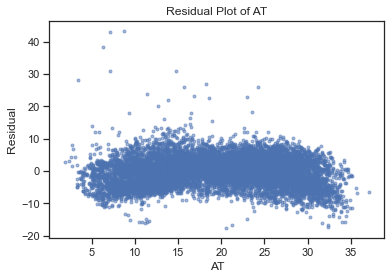

In [612]:
residuals = lm.predict(df) - df.PE
plt.plot(df.AT, residuals, ".", alpha=0.5)
plt.xlabel("AT")
plt.ylabel("Residual");
plt.title("Residual Plot of AT")


Text(0.5, 1.0, 'Residual Plot of AP')

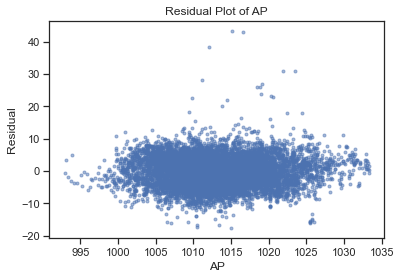

In [613]:
plt.plot(df.AP, residuals, ".", alpha=0.5)
plt.xlabel("AP")
plt.ylabel("Residual");
plt.title("Residual Plot of AP")

Text(0.5, 1.0, 'Residual Plot of RH')

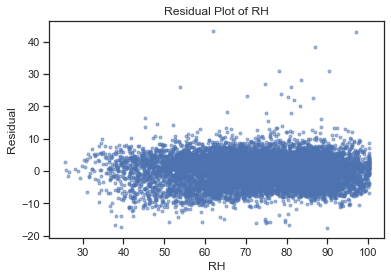

In [614]:
plt.plot(df.RH, residuals, ".", alpha=0.5)
plt.xlabel("RH")
plt.ylabel("Residual");
plt.title("Residual Plot of RH")

Text(0.5, 1.0, 'Residual Plot of RH')

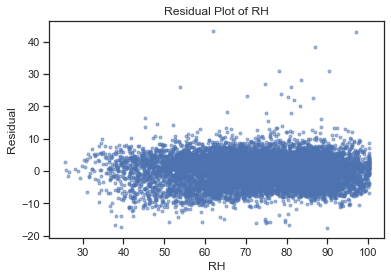

In [615]:
plt.plot(df.RH, residuals, ".", alpha=0.5)
plt.xlabel("RH")
plt.ylabel("Residual");
plt.title("Residual Plot of RH")

In [616]:
# as expected, all of the independent variables in the data set are showing a random pattern. Some residuals are negative while others are positive; there is no non-random shapes such as U-shaped or inverted U. We can conclude at this point that for our predictions, linear regression is a good candidate.

In [617]:
# Feature Selection # Raw data

In [618]:
df_1 = df['AT']
df_2 = df[['AT', 'V']]
df_3 = df[['AT', 'V', 'AP']]
df_4 = df[['AT', 'V', 'AP', 'RH']]

y = df['PE']

In [619]:
#Root Mean Squared Error (RMSE) # Raw data 

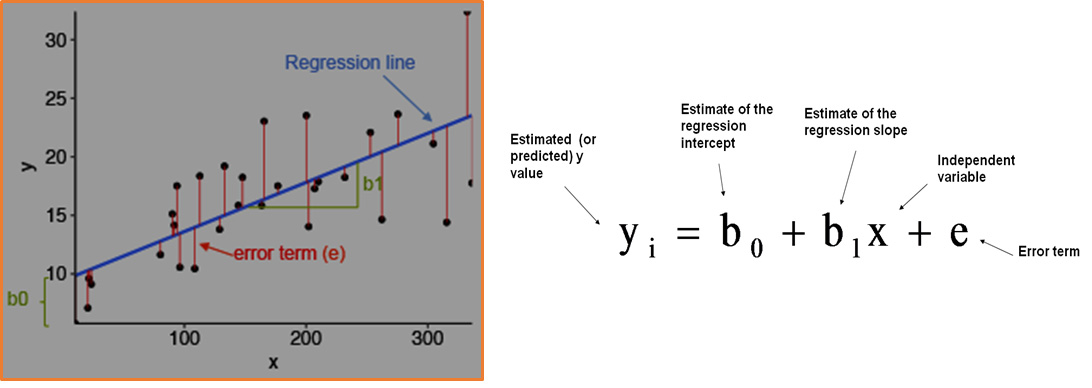

In [620]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

# Linear Regression with one parameter
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = regressor.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.316818730592487
r_squared:  0.9034130676009542
mae:  4.225913433033885


In [621]:
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

# Linear Regression with two parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.82494965305251
r_squared:  0.9204573167404508
mae:  3.851239068584341


In [622]:
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

# Linear Regression with 3 parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.756304649118821
r_squared:  0.9227045386826225
mae:  3.8025186809494405


In [623]:
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

# Linear Regression with 4 parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.406298074515566
r_squared:  0.9336619944003095
mae:  3.5499908529259034


In [624]:
#      df_1	    df_2	df_3	df_4
#RMSE	5.3324	4.848	4.78	4.44
#R2	   .9006	.919	.933	.880
#MAE	4.24	3.85	3.82	3.567


In [625]:
# Decision Tree Regression # Raw data

In [626]:
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = dt_regressor.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.892629601870868
r_squared:  0.8813595045872828
mae:  4.623644179096765


In [627]:
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.574409588284437
r_squared:  0.9285035033230388
mae:  3.1890299547196097


In [628]:
# Decision Tree Regression with 3 parameters

X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.600896197511055
r_squared:  0.9276731525843441
mae:  3.0387095088819227


In [629]:
# Decision Tree Regression with 4 parameters

X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.404442648851492
r_squared:  0.9337178505050683
mae:  3.017816091954023


In [630]:
#Random Forest Regression

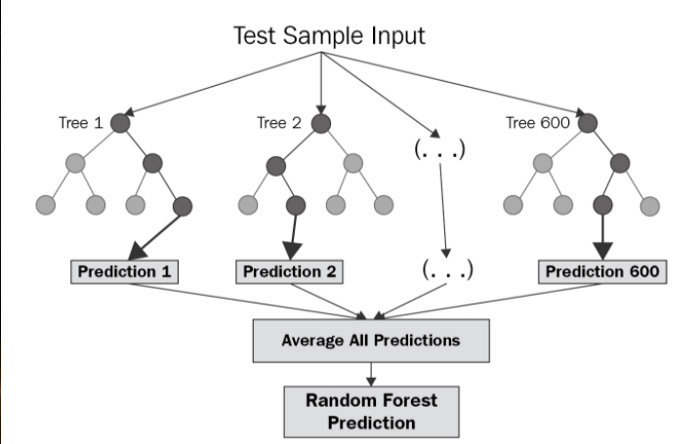

In [631]:
# Random Forest Regression with 1 parameter # Raw data
X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = rf_regressor.predict(X_test.values.reshape(-1,1))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)
# Random Forest Regression with 2 parameters
X_train, X_test, y_train, y_test = train_test_split(df_2, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)
# Random Forest Regression with 3 parameters
X_train, X_test, y_train, y_test = train_test_split(df_3, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)
# Random Forest Regression with 4 parameters
X_train, X_test, y_train, y_test = train_test_split(df_4, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.64442937001118
r_squared:  0.8911434035846503
mae:  4.44952699134174
rmse:  3.563490059521977
r_squared:  0.9566123859198704
mae:  2.6436727871904586
rmse:  3.3182495698115106
r_squared:  0.9623787900631589
mae:  2.396987413793094
rmse:  3.173091188416299
r_squared:  0.9655983105269412
mae:  2.3247076802507793


In [632]:
corr =data_cleaned2.corr()

<AxesSubplot:>

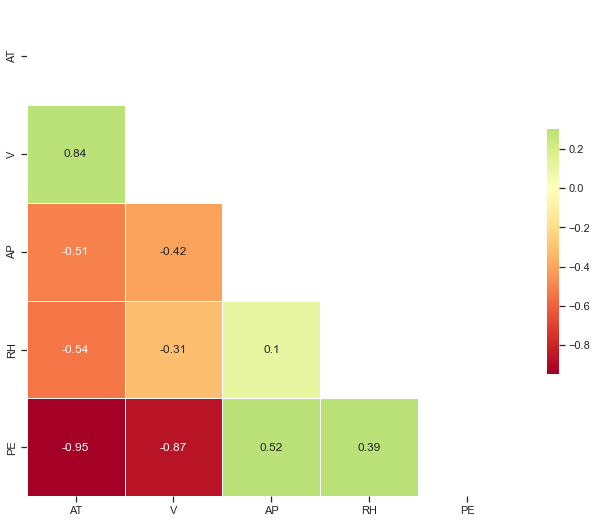

In [633]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdYlGn", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot  = True)

In [634]:
#Clustering # clean data
from scipy.stats import zscore

power_z = data_cleaned2.apply(zscore)

In [635]:
power_z.describe().T

count          mean       std       min       25%       50%       75%  \
AT  9519.0 -2.661783e-16  1.000053 -2.398358 -0.824011  0.092901  0.814869   
V   9519.0  2.030685e-16  1.000053 -2.280865 -0.989153 -0.173750  0.964186   
AP  9519.0 -1.058329e-14  1.000053 -3.424199 -0.700275 -0.053165  0.667156   
RH  9519.0 -1.144396e-16  1.000053 -2.957125 -0.685685  0.112462  0.789324   
PE  9519.0  2.709411e-15  1.000053 -2.001626 -0.856096 -0.162084  0.823154   

         max  
AT  2.347537  
V   2.151016  
AP  3.376775  
RH  1.840694  
PE  2.431358

In [636]:
#### Finding Error for each cluster #### # clean data

cluster_range = range( 1, 50)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
    # Use scaled data in the fit() function.
  clusters.fit(power_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_data_cleaned2 = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

print(clusters_data_cleaned2)

    num_clusters  cluster_errors
0              1    47595.000000
1              2    23454.867750
2              3    19342.609921
3              4    16308.556482
4              5    13887.453535
5              6    12462.019671
6              7    11364.999680
7              8    10491.068407
8              9     9861.994505
9             10     9323.277905
10            11     8830.682619
11            12     8382.124149
12            13     7996.978293
13            14     7661.216683
14            15     7350.151936
15            16     7073.854398
16            17     6833.916617
17            18     6632.578380
18            19     6451.014421
19            20     6269.012673
20            21     6110.176615
21            22     5932.680727
22            23     5777.206569
23            24     5627.255924
24            25     5496.484367
25            26     5399.146477
26            27     5274.397571
27            28     5157.704157
28            29     5038.785293
29        

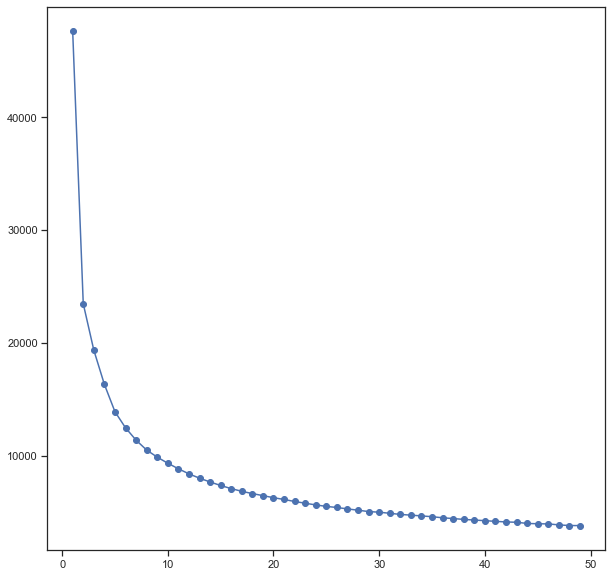

In [637]:
# Elbow plot
# clean data
plt.figure(figsize=(10,10))
plt.plot( clusters_data_cleaned2.num_clusters, clusters_data_cleaned2.cluster_errors, marker = "o" )

In [638]:
#Silhouette Analysis

In [639]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.4245816619964427


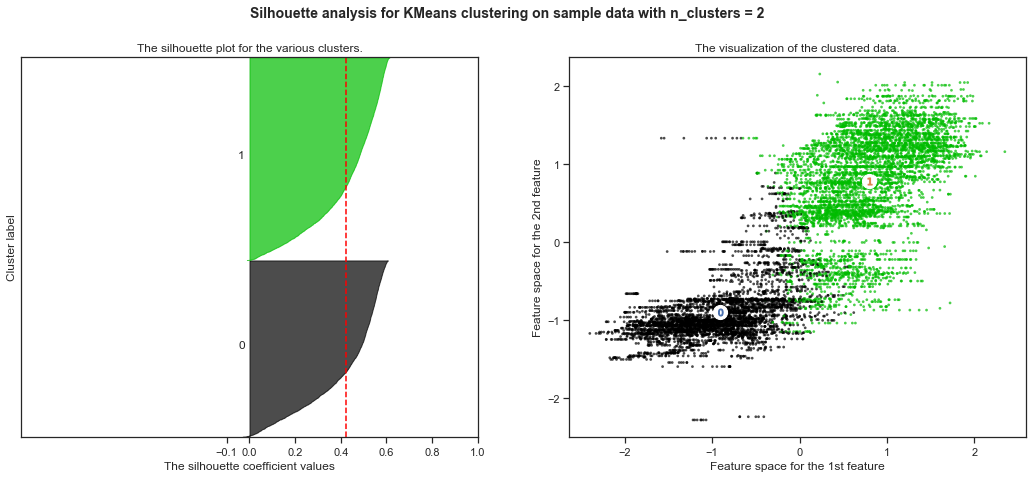

For n_clusters = 3 The average silhouette_score is : 0.30968515810820374


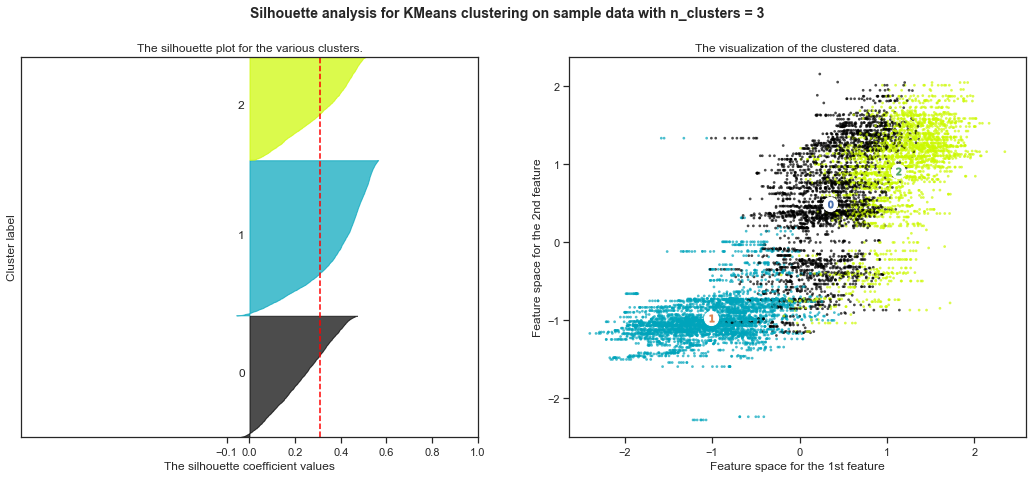

For n_clusters = 4 The average silhouette_score is : 0.2567725090409334


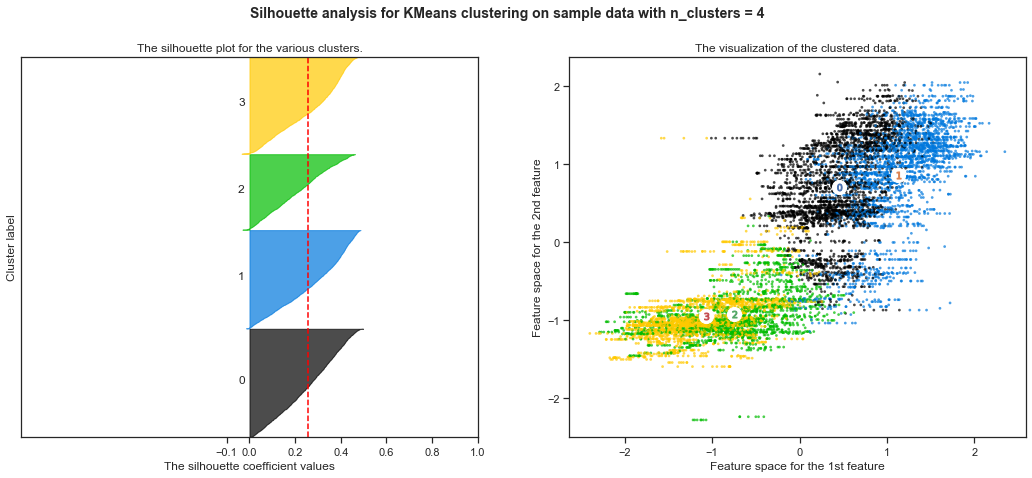

For n_clusters = 5 The average silhouette_score is : 0.26682946864792895


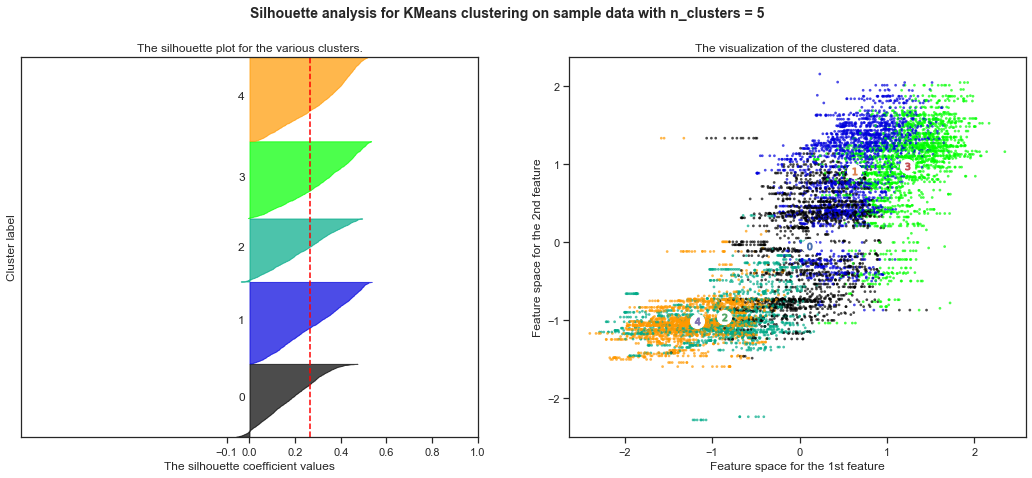

For n_clusters = 6 The average silhouette_score is : 0.26234770525156526


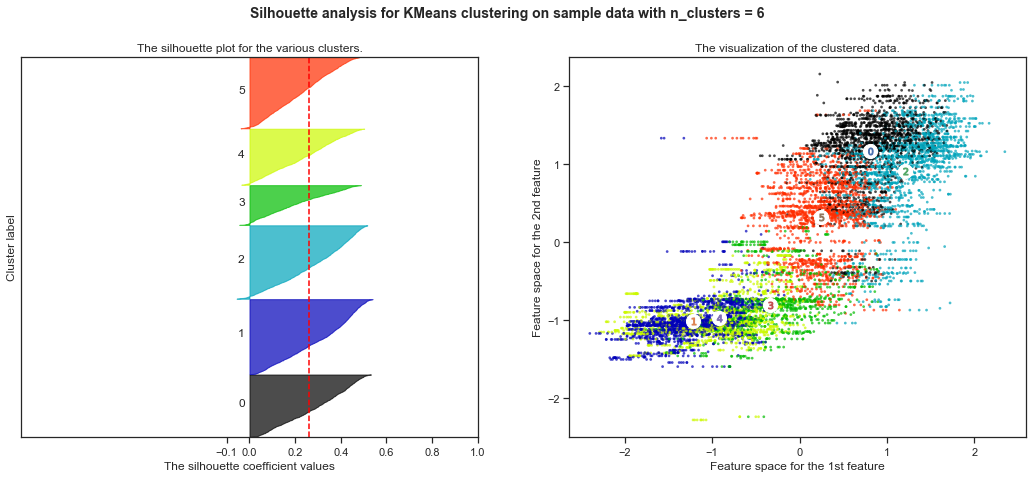

For n_clusters = 7 The average silhouette_score is : 0.25945923062717285


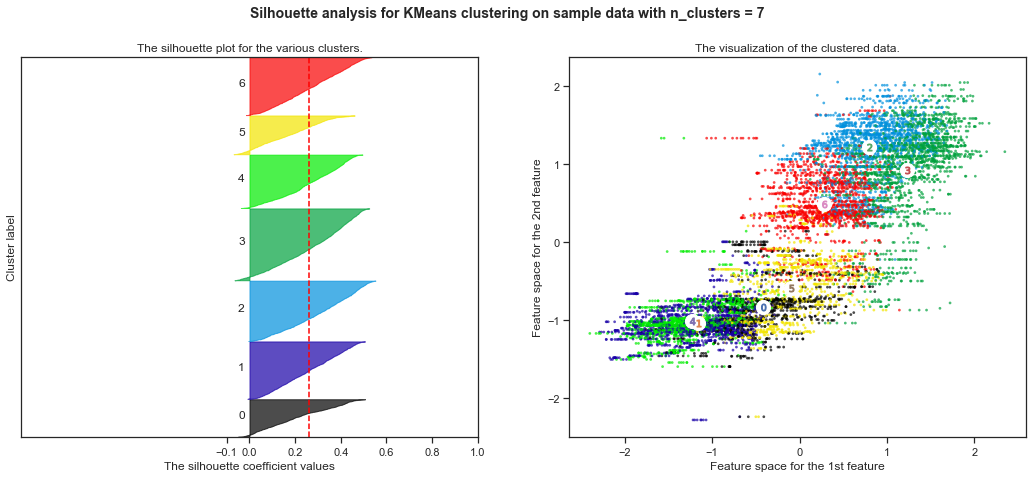

For n_clusters = 8 The average silhouette_score is : 0.24851662226055588


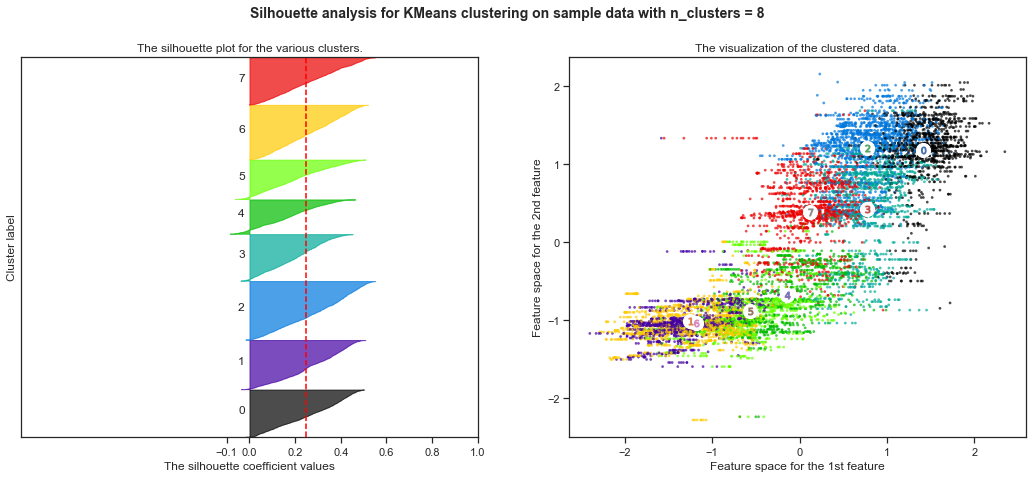

For n_clusters = 9 The average silhouette_score is : 0.24575790421916427


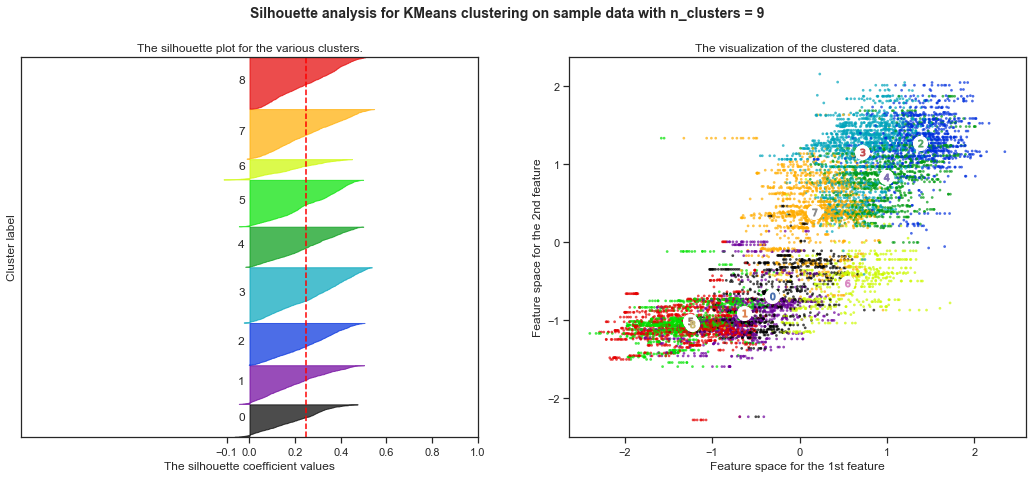

For n_clusters = 10 The average silhouette_score is : 0.2376365748531655


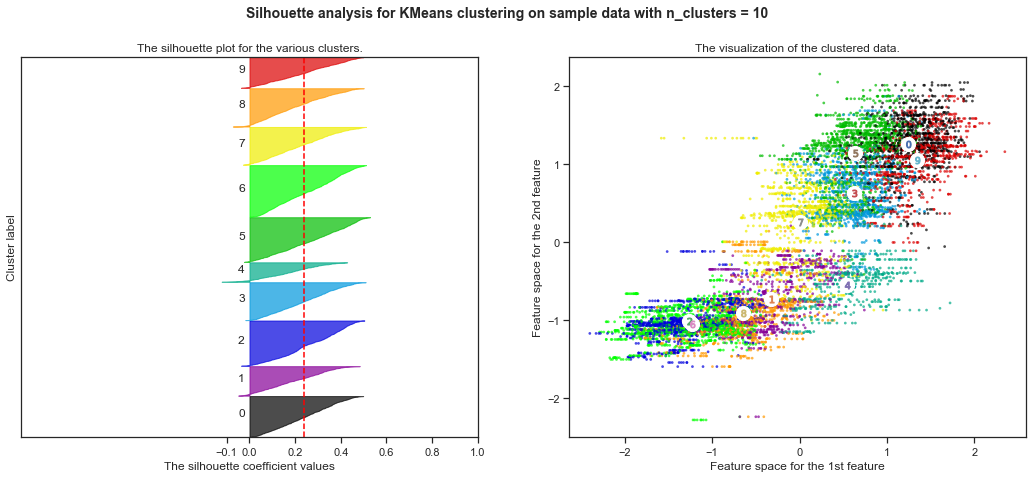

In [640]:
cluster_range = range( 2, 11 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(power_z) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( power_z )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(power_z, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(power_z, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = plt.cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(power_z.values[:, 0], power_z.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

In [641]:
######################################
##### Cluster API #####
def ClusterView(n):
    cluster = KMeans( n_clusters = n, random_state = 100 )
    cluster.fit(power_z)
        # To get the values of Centroid
    centroids = cluster.cluster_centers_
    centroid_df = pd.DataFrame(centroids, columns = list(power_z) )
    #print(centroid_df)
    prediction=cluster.predict(power_z)
    power_z["GROUP"] = prediction
    print(power_z.head())

        ## Observing the Clusters
    power_z.boxplot(by = 'GROUP',layout=(4,3) ,figsize=(15, 20))
    
    #### Modifying Outliers
    data = power_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
    def replace(group):
        median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
        outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
        group[outliers] = group.median()       
        return group

    data_corrected = (data.groupby('GROUP').transform(replace)) 
    concat_data = data_corrected.join(pd.DataFrame(power_z['GROUP']))
    
    ## Reviewing the Clusters after removing the outliers
    concat_data.boxplot(by = 'GROUP', layout=(4,3), figsize=(15, 20))

         AT         V        AP        RH        PE  GROUP
0 -1.352379 -1.239925  0.635179 -0.912108  1.582339      9
1 -1.022989 -0.941838  1.091271  1.463438  0.646421      1
2 -0.776956 -0.725764  1.882277  0.571491  0.653467      6
3 -0.797122  0.001317  0.783283  0.392140  0.745650      1
4 -0.606211 -0.366167  1.774566  0.111775  0.541909      6


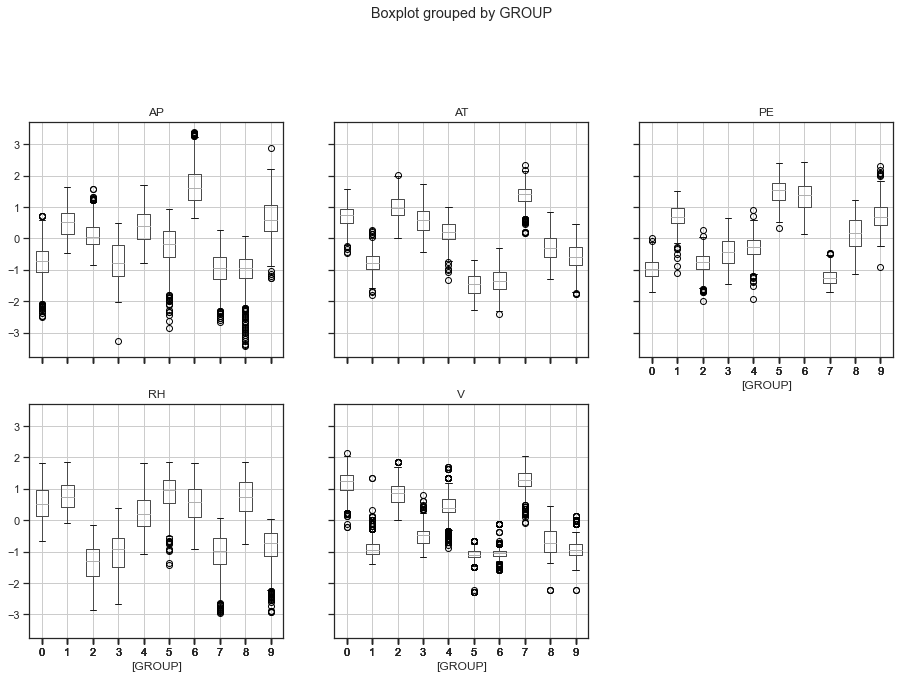

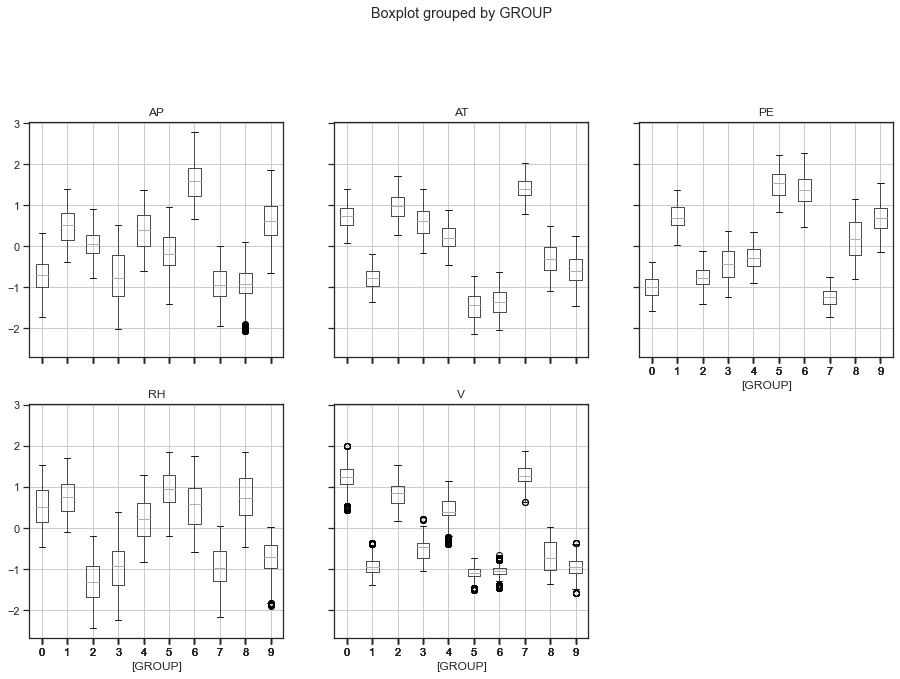

In [642]:
ClusterView(10)

In [643]:
#Observations:
#1. Power for Cluster-0 is higher than Cluster-1
#2. The Humidity and Pressure distribution is on a higher level for Cluster-0 than for cluster-1,suggesting that to increase Power - Humidity and Pressure should also be increased.
#3. Similarly, Temperature and Vacuum are on a lower level for Cluster-0. Thus reflecting that for high levels of power to be generated, the Plant Temperature and Vacuum levels should be as low as possible.

In [644]:
power_z

AT         V        AP        RH        PE  GROUP
0    -1.352379 -1.239925  0.635179 -0.912108  1.582339      9
1    -1.022989 -0.941838  1.091271  1.463438  0.646421      1
2    -0.776956 -0.725764  1.882277  0.571491  0.653467      6
3    -0.797122  0.001317  0.783283  0.392140  0.745650      1
4    -0.606211 -0.366167  1.774566  0.111775  0.541909      6
...        ...       ...       ...       ...       ...    ...
9563 -0.342699 -0.362224 -1.296896  0.580425  0.174353      8
9564  0.683113  0.871921  0.367584 -1.413742 -0.436283      2
9565  1.450792  0.154303 -1.354118 -1.177355 -1.468493      7
9566  0.450524  0.927911  1.241057  0.475288 -1.924709      4
9567 -0.255310 -0.396922  1.283132 -0.666788  0.003492      9

[9519 rows x 6 columns]

In [645]:
power_z.columns

Index(['AT', 'V', 'AP', 'RH', 'PE', 'GROUP'], dtype='object')

In [646]:
x = power_z[['AT', 'V', 'AP', 'RH']]
y = data_cleaned2.PE

In [647]:
# intermediate/test split (gives us test set)

x_intermediate, x_test, y_intermediate, y_test = train_test_split(x,y,  test_size = 0.2, random_state =500, shuffle = True)

# train/validation split (gives us train and validation sets)
x_train, x_val, y_train, y_val = train_test_split(x_intermediate, y_intermediate,  test_size = 0.25, random_state =500, shuffle = True)

In [648]:
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_val)/len(y) ,2), 
                                                        round(len(y_test)/len(y),2) ) )

train: 0.6% | Validation: 0.2% | Test: 0.2%


In [649]:
# Various Degrees at which we will test the Polynomial Regression Model
degrees = [1,2,3,4,5,6]
val_error = []
regression_model = LinearRegression()

### Cross Validation for Interaction Only
for degree in degrees:
    poly = PolynomialFeatures( degree = degree, interaction_only= True)
    x_poly = poly.fit_transform(x_intermediate)
    reg = regression_model.fit(x_poly,y_intermediate)
    errors = np.sum( -cross_val_score(reg, x_poly, y_intermediate ,scoring= 'neg_mean_absolute_error', cv=10))
    
    val_error.append(np.sqrt(errors))

    # RMSE
print(val_error)
print('Lowest Error rate for the degree: {}'.format(degrees[np.argmin(val_error)]))

[6.037452565137726, 5.840563697533091, 5.793602376598911, 5.791802493215959, 5.791802493215959, 5.791802493215959]
Lowest Error rate for the degree: 4


In [650]:
# Performing a 10-fold cross validation
K = 10

In [651]:
# We need to convert 'x' into array to do the KFold.split
x_array = np.array(x)

In [652]:
########### Defining Functions to calculate Error Metrics ###############

## Returns in-sample error for already fit model
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
## Returns out-of-sample error for already fit model   
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
## fits model and returns the RMSE for in-sample error and out-of-sample error   
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [653]:
### Performing the K-fold Cross Validation
kf = KFold(n_splits=K, shuffle = True, random_state=10)
for degree in degrees:
    training_error = []
    validation_error = []
    for train_index, val_index in kf.split(x_array,y):
        
        # Instantiating Model
        poly = PolynomialFeatures( degree = degree, interaction_only= True)
        x_poly = poly.fit_transform(x_array)
        reg = regression_model.fit(x_poly,y)
        
        # Split data
        x_train, x_val = x_poly[train_index], x_poly[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
            
        # Calculate Error
        train_error, val_error = calc_metrics(x_train, y_train, x_val, y_val, reg)
        
        # append to appropriate list
        training_error.append(train_error)
        validation_error.append(val_error)
# generate report
    print('Degree: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(degree,
                 round(np.mean(training_error),4),
                 round(np.mean(validation_error),4)))

Degree:      1 | mean(train_error): 20.7932 | mean(val_error): 20.8192
Degree:      2 | mean(train_error): 18.5473 | mean(val_error): 18.6089
Degree:      3 | mean(train_error): 18.2041 | mean(val_error): 18.2762
Degree:      4 | mean(train_error): 18.1865 | mean(val_error): 18.2625
Degree:      5 | mean(train_error): 18.1865 | mean(val_error): 18.2625
Degree:      6 | mean(train_error): 18.1865 | mean(val_error): 18.2625


In [654]:
#LASSO

In [655]:
alphas = [0.0001,0.001,0.01,0.1,0.2,0.3,0.5,0.9,0.99]

In [656]:
# Polynomial degree is set to 4.
# Observing for Interaction only.
kf = KFold(n_splits=8, shuffle = True, random_state=100)
for alpha in alphas:
    training_error = []
    validation_error = []
    for train_index, val_index in kf.split(x_array,y):
        
        # Polynomial Transformation
        poly = PolynomialFeatures( degree = 4, interaction_only= True)
        x_poly = poly.fit_transform(x_array)
        
        
        # Split data
        x_train, x_val = x_poly[train_index], x_poly[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        #Instantiating Model
        lasso = Lasso(alpha= alpha, fit_intercept=True, random_state=100)
            
        # Calculate Error
        train_error, val_error = calc_metrics(x_train, y_train, x_val, y_val, lasso)
        
        # append to appropriate list
        training_error.append(train_error)
        validation_error.append(val_error)
# generate report
    print('Alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(training_error),4),
                 round(np.mean(validation_error),4)))

Alpha: 0.0001 | mean(train_error): 18.1856 | mean(val_error): 18.2599
Alpha:  0.001 | mean(train_error): 18.1857 | mean(val_error): 18.2596
Alpha:   0.01 | mean(train_error):  18.196 | mean(val_error): 18.2657
Alpha:    0.1 | mean(train_error): 18.4509 | mean(val_error): 18.4959
Alpha:    0.2 | mean(train_error): 18.8863 | mean(val_error): 18.9272
Alpha:    0.3 | mean(train_error): 19.2773 | mean(val_error): 19.3144
Alpha:    0.5 | mean(train_error): 20.2258 | mean(val_error): 20.2595
Alpha:    0.9 | mean(train_error): 23.3992 | mean(val_error): 23.4351
Alpha:   0.99 | mean(train_error): 24.1904 | mean(val_error): 24.2223


In [657]:
# Saving the names of New columns
polyNames = np.array(poly.get_feature_names(input_features= x.columns))

x_train, x_test, y_train, y_test = train_test_split(x_poly,y, shuffle = True, test_size = 0.3, random_state =1)

lasso = Lasso(alpha= 0.0001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [658]:
# Adjusted R^2

def AdjRsquare(model,x,y):
    Rsquare = model.score(x,y)
    noData = len(y)
    p = x.shape[1]
    tempRsquare = 1 - ((1 - Rsquare)*(noData - 1 ))/(noData - p - 1)
    return tempRsquare

In [659]:
# Model Metrics
print("R^2 for test model:",round(lasso.score(x_test,y_test), 3))
print("Adjusted R^2 for test model:", round(AdjRsquare(lasso, x_test,y_test),3))
print("R^2 for train model:",round(lasso.score(x_train,y_train),3))

print("Adjusted R^2 for train model:", round(AdjRsquare(lasso, x_train,y_train),3))

R^2 for test model: 0.932
Adjusted R^2 for test model: 0.931
R^2 for train model: 0.94
Adjusted R^2 for train model: 0.939


In [660]:
import klib


In [661]:
#Bootstrapping

In [662]:
# Fetching the Dataframe values in a matrix format
# Dropping the group column as its not needed!!!
values = power_z[['AT', 'V', 'AP', 'RH', 'PE']].values

In [663]:
n_iterations = 100
sample_size = int(len(power_z)* 0.08)


In [664]:
#Bootstrap Model

In [665]:
stats = list()
for i in range(n_iterations):
    # Train and Test Data
    train = resample(values, n_samples = sample_size) # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) #Out of Box Data
    # Model fitting
    
    lasso.fit(train[:,:-1], train[:,-1])
    
    R_score = lasso.score(test[:,:-1], test[:,-1])
    
    stats.append(R_score)

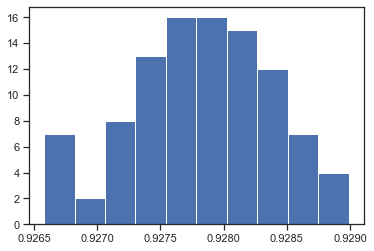

95 percent confidence interval of R^2 : 92.7% and 92.9%


In [666]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.f percent confidence interval of R^2 : %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [667]:
# cleaned data 
lm = smf.ols(formula="PE ~ AT + V + AP + RH", data=data_cleaned2).fit()
lm.params

Intercept    456.097679
AT            -1.973528
V             -0.236026
AP             0.060585
RH            -0.157329
dtype: float64

In [668]:
lm.predict(pd.DataFrame({"AT": [9.48], "V": [44.71], "AP": [1019.12], "RH": [66.43]}))

0    478.127764
dtype: float64

Text(0.5, 1.0, 'Residual Plot of AT')

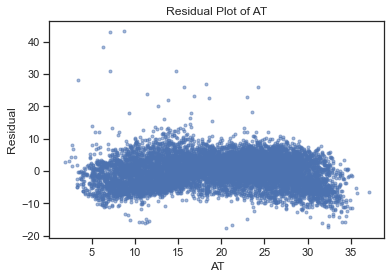

In [669]:

residuals = lm.predict(data_cleaned2) - data_cleaned2.PE
plt.plot(data_cleaned2.AT, residuals, ".", alpha=0.5)
plt.xlabel("AT")
plt.ylabel("Residual");
plt.title("Residual Plot of AT")

Text(0.5, 1.0, 'Residual Plot of V')

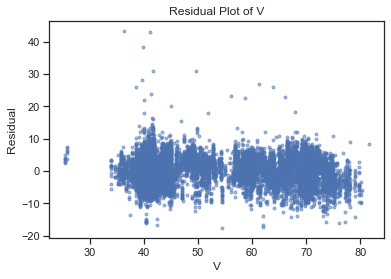

In [670]:
plt.plot(data_cleaned2.V, residuals, ".", alpha=0.5)
plt.xlabel("V")
plt.ylabel("Residual");
plt.title("Residual Plot of V")

Text(0.5, 1.0, 'Residual Plot of AP')

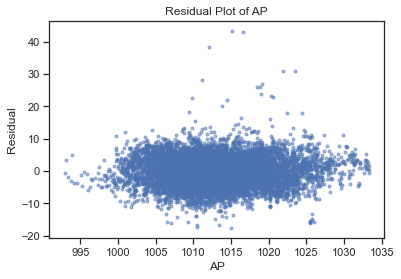

In [671]:
plt.plot(data_cleaned2.AP, residuals, ".", alpha=0.5)
plt.xlabel("AP")
plt.ylabel("Residual");
plt.title("Residual Plot of AP")

Text(0.5, 1.0, 'Residual Plot of RH')

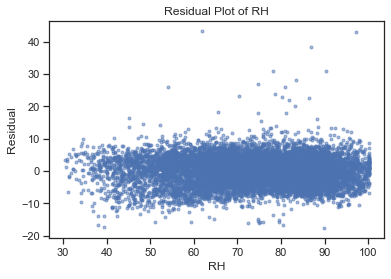

In [672]:
plt.plot(data_cleaned2.RH, residuals, ".", alpha=0.5)
plt.xlabel("RH")
plt.ylabel("Residual");
plt.title("Residual Plot of RH")

In [673]:
df_101 = data_cleaned2['AT']
df_202 = data_cleaned2[['AT', 'V']]
df_303 = data_cleaned2[['AT', 'V', 'AP']]
df_404 = data_cleaned2[['AT', 'V', 'AP', 'RH']]

y = data_cleaned2['PE']

In [674]:
X_train, X_test, y_train, y_test = train_test_split(df_101, y, test_size = 0.2, random_state = 0)

# Linear Regression with one parameter
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = regressor.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  5.513733755564569
r_squared:  0.8929762191482781
mae:  4.384601714292554


In [675]:
X_train, X_test, y_train, y_test = train_test_split(df_202, y, test_size = 0.2, random_state = 0)

# Linear Regression with two parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.990896806926117
r_squared:  0.9123108445134741
mae:  3.9840470301968622


In [676]:
X_train, X_test, y_train, y_test = train_test_split(df_303, y, test_size = 0.2, random_state = 0)

# Linear Regression with 3 parameters
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.909903171057064
r_squared:  0.9151338380819447
mae:  3.937715822527644


In [677]:
# Decision Tree Regression with 4 parameters

X_train, X_test, y_train, y_test = train_test_split(df_404, y, test_size = 0.2, random_state = 0)

regressor= LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

rmse:  4.59837160709039
r_squared:  0.9255616331105209
mae:  3.695541344771096


In [678]:
# Random Forest Regression with 1 parameter
X_train, X_test, y_train, y_test = train_test_split(df_101, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred = rf_regressor.predict(X_test.values.reshape(-1,1))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('1st model rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)
# Random Forest Regression with 2 parameters
X_train, X_test, y_train, y_test = train_test_split(df_202, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('2nd model rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)
# Random Forest Regression with 3 parameters
X_train, X_test, y_train, y_test = train_test_split(df_303, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('3rd model rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)
# Random Forest Regression with 4 parameters
X_train, X_test, y_train, y_test = train_test_split(df_404, y, test_size = 0.2, random_state = 0)

rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('4th model rmse: ', rmse)

r_squared = r2_score(y_test, y_pred)
print('r_squared: ', r_squared)

mae = mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

1st model rmse:  5.82195236952795
r_squared:  0.8806764946984666
mae:  4.572688078432272
2nd model rmse:  3.602318482801477
r_squared:  0.9543171784794746
mae:  2.6496166024534893
3rd model rmse:  3.320972091841824
r_squared:  0.9611743121394386
mae:  2.378190755427166
4th model rmse:  3.256140458108444
r_squared:  0.9626754167065298
mae:  2.344511344537816


In [679]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

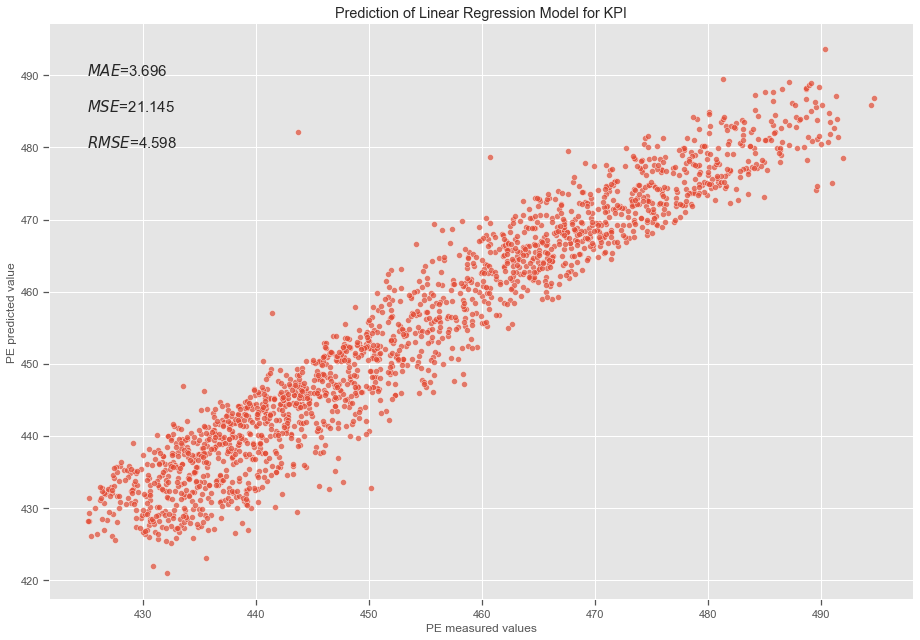

In [680]:
PE_pred = lm.predict(X_test)
plt.style.use('ggplot')

from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test, PE_pred)
MSE=metrics.mean_squared_error(y_test, PE_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, PE_pred))

MAE_str=('$MAE$={:.3f}'.format(MAE))
MSE_str=('$MSE$={:.3f}'.format(MSE))
RMSE_str=('$RMSE$={:.3f}'.format(RMSE))

#fig, axes = plt.subplots(figsize=(12,8))

fig=fig = plt.figure(figsize=(12,8))

axes = fig.add_axes([0,0,1,1])

axes.scatter(y_test.values,PE_pred, alpha=0.7, edgecolor='w')
axes.set_xlabel('PE measured values')
axes.set_ylabel('PE predicted value')
axes.set_title('Prediction of Linear Regression Model for KPI')
axes.text(425, 490, MAE_str, fontsize=15)
axes.text(425, 485, MSE_str, fontsize=15)
axes.text(425, 480, RMSE_str, fontsize=15)
plt.show()

Shape of cleaned data: (9527, 5)Remaining NAs: 0

Changes:
Dropped rows: 41
     of which 41 duplicates. (Rows: [2066, 2780, 3333, 3467, 3550, 3747, 4292, 4528, 5065, 5564, 5812, 5975, 5983, 6413, 6861, 6948, 7065, 7124, 7231, 7274, 7453, 7675, 7732, 7779, 7821, 7839, 7843, 7907, 7948, 8212, 8290, 8542, 8777, 8879, 9028, 9154, 9163, 9272, 9482, 9521, 9537])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.14 MB (-37.84%)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:xlabel='PE', ylabel='Density'>

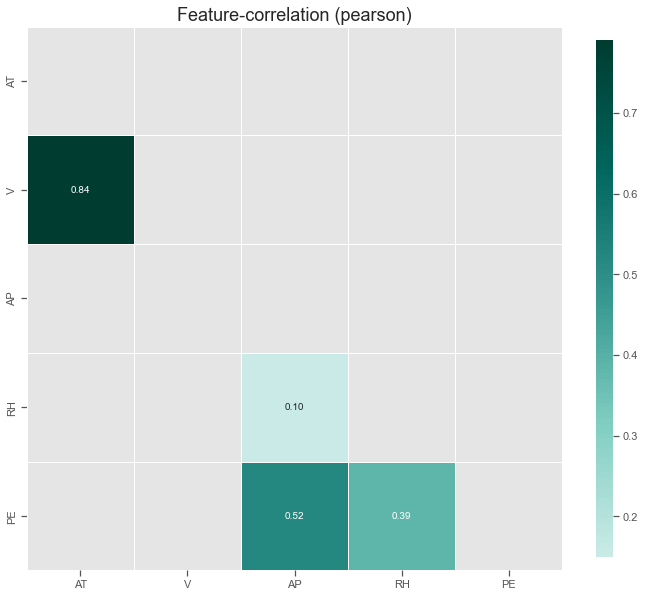

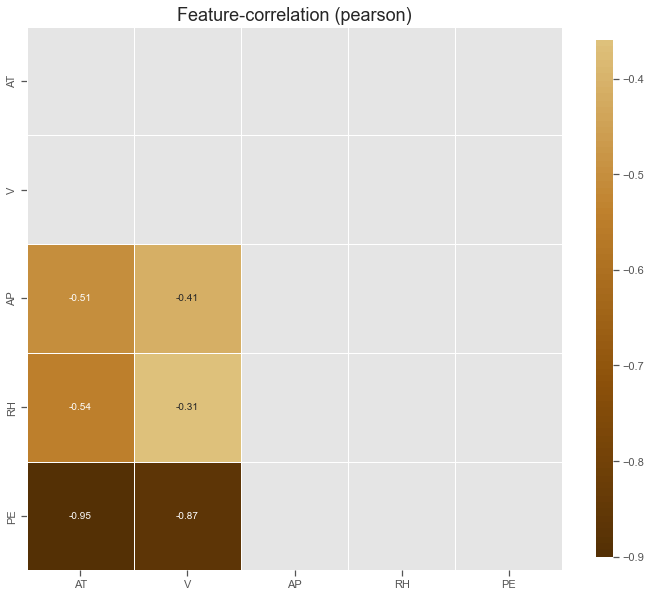

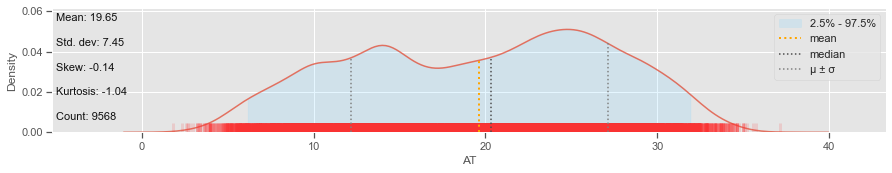

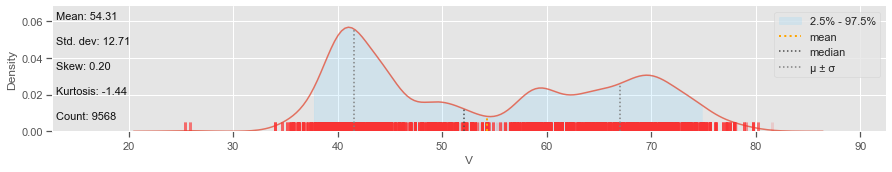

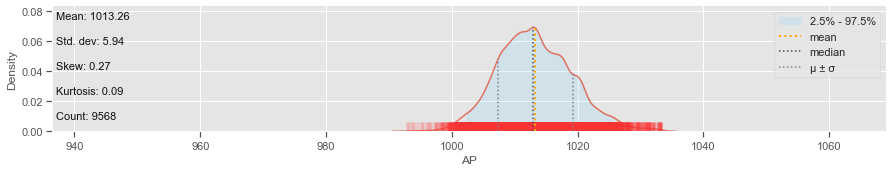

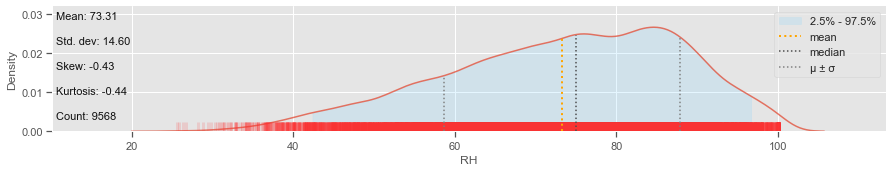

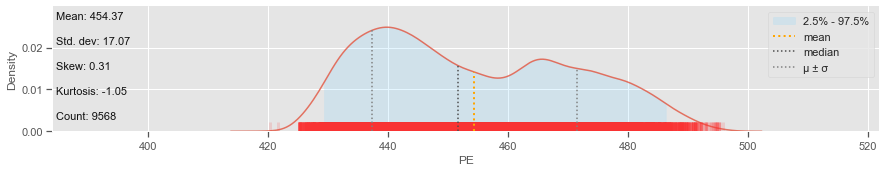

In [681]:
# klib functions
klib.data_cleaning(df)
klib.corr_plot(df, split='pos') 
klib.corr_plot(df, split='neg')
klib.dist_plot(df)

In [682]:
klib.corr_mat(df)

In [683]:
klib.data_cleaning(df)

Shape of cleaned data: (9527, 5)Remaining NAs: 0

Changes:
Dropped rows: 41
     of which 41 duplicates. (Rows: [2066, 2780, 3333, 3467, 3550, 3747, 4292, 4528, 5065, 5564, 5812, 5975, 5983, 6413, 6861, 6948, 7065, 7124, 7231, 7274, 7453, 7675, 7732, 7779, 7821, 7839, 7843, 7907, 7948, 8212, 8290, 8542, 8777, 8879, 9028, 9154, 9163, 9272, 9482, 9521, 9537])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.14 MB (-37.84%)



at          v           ap         rh          pe
0          9.59  38.560001   1017.01001  60.099998  481.299988
1         12.04      42.34  1019.719971  94.669998  465.359985
2         13.87  45.080002  1024.420044  81.690002  465.480011
3         13.72  54.299999  1017.890015  79.080002  467.049988
4         15.14  49.639999  1023.780029       75.0  463.579987
...         ...        ...          ...        ...         ...
9522       17.1  49.689999  1005.530029      81.82  457.320007
9523      24.73  65.339996  1015.419983  52.799999  446.920013
9524  30.440001  56.240002  1005.190002  56.240002  429.339996
9525       23.0  66.050003  1020.609985  80.290001  421.570007
9526      17.75      49.25  1020.859985  63.669998  454.410004

[9527 rows x 5 columns]

In [684]:
klib.clean_column_names(df)

at      v       ap     rh      pe
0      9.59  38.56  1017.01  60.10  481.30
1     12.04  42.34  1019.72  94.67  465.36
2     13.87  45.08  1024.42  81.69  465.48
3     13.72  54.30  1017.89  79.08  467.05
4     15.14  49.64  1023.78  75.00  463.58
...     ...    ...      ...    ...     ...
9563  17.10  49.69  1005.53  81.82  457.32
9564  24.73  65.34  1015.42  52.80  446.92
9565  30.44  56.24  1005.19  56.24  429.34
9566  23.00  66.05  1020.61  80.29  421.57
9567  17.75  49.25  1020.86  63.67  454.41

[9568 rows x 5 columns]

In [685]:
klib.data_cleaning(df)

Shape of cleaned data: (9527, 5)Remaining NAs: 0

Changes:
Dropped rows: 41
     of which 41 duplicates. (Rows: [2066, 2780, 3333, 3467, 3550, 3747, 4292, 4528, 5065, 5564, 5812, 5975, 5983, 6413, 6861, 6948, 7065, 7124, 7231, 7274, 7453, 7675, 7732, 7779, 7821, 7839, 7843, 7907, 7948, 8212, 8290, 8542, 8777, 8879, 9028, 9154, 9163, 9272, 9482, 9521, 9537])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.14 MB (-37.84%)



at          v           ap         rh          pe
0          9.59  38.560001   1017.01001  60.099998  481.299988
1         12.04      42.34  1019.719971  94.669998  465.359985
2         13.87  45.080002  1024.420044  81.690002  465.480011
3         13.72  54.299999  1017.890015  79.080002  467.049988
4         15.14  49.639999  1023.780029       75.0  463.579987
...         ...        ...          ...        ...         ...
9522       17.1  49.689999  1005.530029      81.82  457.320007
9523      24.73  65.339996  1015.419983  52.799999  446.920013
9524  30.440001  56.240002  1005.190002  56.240002  429.339996
9525       23.0  66.050003  1020.609985  80.290001  421.570007
9526      17.75      49.25  1020.859985  63.669998  454.410004

[9527 rows x 5 columns]

In [686]:
klib.pool_duplicate_subsets(df)

at      v       ap     rh      pe
0      9.59  38.56  1017.01  60.10  481.30
1     12.04  42.34  1019.72  94.67  465.36
2     13.87  45.08  1024.42  81.69  465.48
3     13.72  54.30  1017.89  79.08  467.05
4     15.14  49.64  1023.78  75.00  463.58
...     ...    ...      ...    ...     ...
9563  17.10  49.69  1005.53  81.82  457.32
9564  24.73  65.34  1015.42  52.80  446.92
9565  30.44  56.24  1005.19  56.24  429.34
9566  23.00  66.05  1020.61  80.29  421.57
9567  17.75  49.25  1020.86  63.67  454.41

[9568 rows x 5 columns]